In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
datapath = r'https://raw.githubusercontent.com/jermwatt/machine_learning_refined/602412f222afe4d5497472037b0e62002d5a1d65/exercises/ed_2/mlrefined_datasets/superlearn_datasets/'

# Exercise 6.1. Implementing sigmoidal Least Squares cost

In [4]:
# load in data
csvname = datapath + r'\2d_classification_data_v1_entropy.csv'

data = np.loadtxt(csvname,delimiter = ',')
# get input/output pairs
X = data[:-1,:]
Y = data[-1:,:]
print(np.shape(X))
print(np.shape(Y))

(1, 11)
(1, 11)


In [5]:
X_train = np.vstack((X, np.ones((1,np.shape(X)[1]))))
Y_train = Y[0]
print(np.shape(X_train))
print(np.shape(Y_train))

(2, 11)
(11,)


In [6]:
def sigma(t):
    return 1/(1+np.exp(-t)) 

In [7]:
def Dsigma(t):
    return sigma(t)*(1-sigma(t))

In [8]:
def sigma_squares_cost(X,Y,w):
    return np.sum((sigma(np.dot(X.T,w))-Y)**2)
    

In [9]:
def normalized_gradient_sigma_least_squares(X,Y,w): 
    gradient = np.zeros((len(w),1))
    for i in range(X.shape[1]):
        gradient += 2*(sigma(np.dot(X[:,i],w))-Y[i])*Dsigma(np.dot(X[:,i],w))*X[:,i].reshape(-1,1)
    return gradient/np.linalg.norm(gradient)

In [10]:
def gradient_decent(X,Y,w_start,step_size,max_its):
    w = w_start
    weight_history = [w]
    cost_history = [sigma_squares_cost(X,Y,w)]
    for _ in range(max_its):
        grad = normalized_gradient_sigma_least_squares(X,Y,w)
        w = w - step_size*grad
        weight_history.append(w)
        cost_history.append(sigma_squares_cost(X,Y,w))
    return weight_history,cost_history

In [11]:
w_start = np.array([[0],[0]])
step_size = 10
max_its = 1000
weight_history,cost_history = gradient_decent(X_train,Y_train,w_start,step_size,max_its)


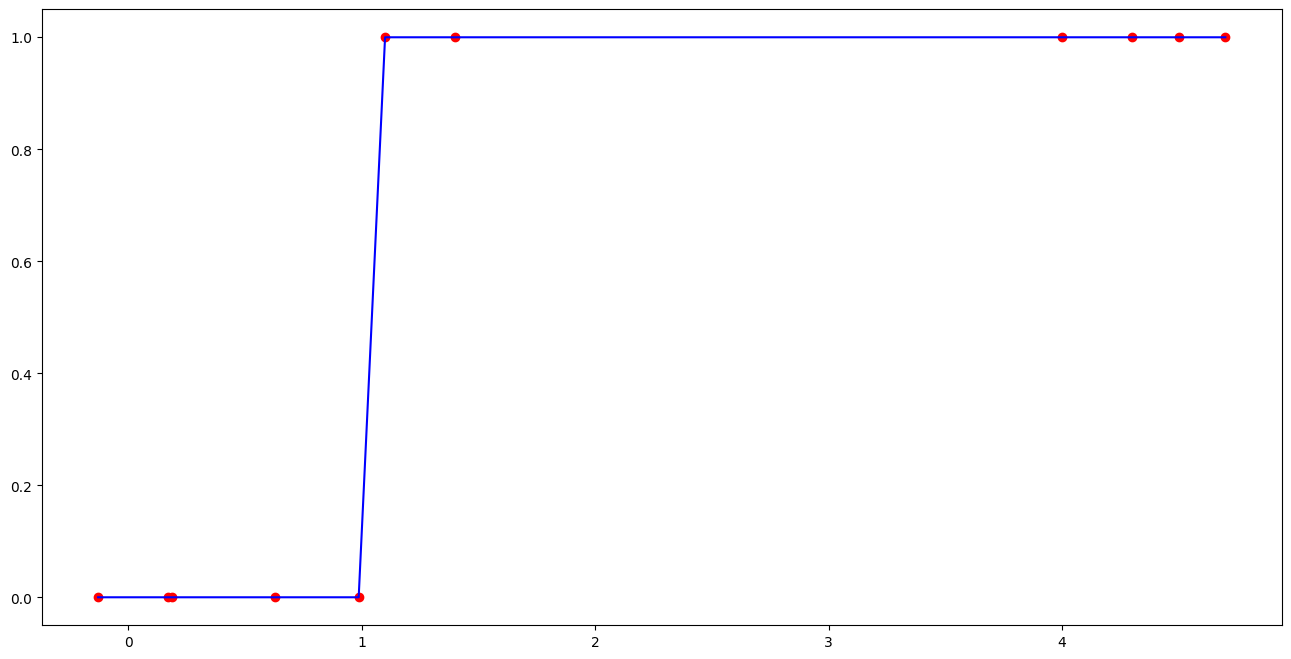

In [12]:
plt.figure(figsize = (16,8))
plt.scatter(X,Y,c='red')
plt.plot(X.reshape(-1,1),sigma(np.dot(X_train.T,weight_history[-1])),c='blue')
plt.show()

# Exercise 6.7. Implementing the Softmax cost

In [13]:
# load in data
csvname = datapath + '/2d_classification_data_v1.csv'
data = np.loadtxt(csvname,delimiter = ',')

# take input/output pairs from data
X = data[:-1,:]
Y = data[-1:,:] 

print(np.shape(X))
print(np.shape(Y))

(1, 11)
(1, 11)


In [14]:
X_train = np.vstack((X, np.ones((1,np.shape(X)[1])))).transpose()
Y_train = Y[0]
print(np.shape(X_train))
print(np.shape(Y_train))
print(X_train)
print(Y_train)

(11, 2)
(11,)
[[-0.12945952  1.        ]
 [ 0.17126776  1.        ]
 [ 0.18900687  1.        ]
 [ 0.62817746  1.        ]
 [ 0.98698383  1.        ]
 [ 1.1         1.        ]
 [ 1.4         1.        ]
 [ 4.          1.        ]
 [ 4.3         1.        ]
 [ 4.5         1.        ]
 [ 4.7         1.        ]]
[-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.]


In [15]:
def tanh(t):
    return (np.exp(t)-np.exp(-t))/(np.exp(t)+np.exp(-t))

In [16]:
def soft_max(t):
    return np.log(1+np.exp(t))

In [17]:
def soft_max_cost(X,Y,w):
    cost = 0
    for i in range(X.shape[0]):
        cost += soft_max( -Y[i] * np.dot(X[i,:],w) )
    return cost/X.shape[1]

In [18]:
def soft_max_gradient(X,Y,w):
    gradient = np.zeros(len(w))
    for i in range(X.shape[0]):
        gradient += -Y[i]* X[i,:]/(1+np.exp(Y[i]*np.dot(X[i,:],w)))
    return gradient/X.shape[0]

In [19]:
def soft_max_gradient_decent(X,Y,w_start,step_size,max_its):
    w = w_start
    weight_history = [w]
    cost_history = [soft_max_cost(X,Y,w)]
    for _ in range(max_its):
        grad = soft_max_gradient(X,Y,w)
        w = w - step_size*grad
        weight_history.append(w)
        cost_history.append(soft_max_cost(X,Y,w))
    return weight_history,cost_history

In [20]:
w_start = np.array([-3,3])
step_size = 10
max_its = 10000
weight_history,cost_history = soft_max_gradient_decent(X_train,Y_train,w_start,step_size,max_its)
print(cost_history[-1])
print(weight_history[-1])

0.03672182189447022
[ 58.15770411 -60.65780137]


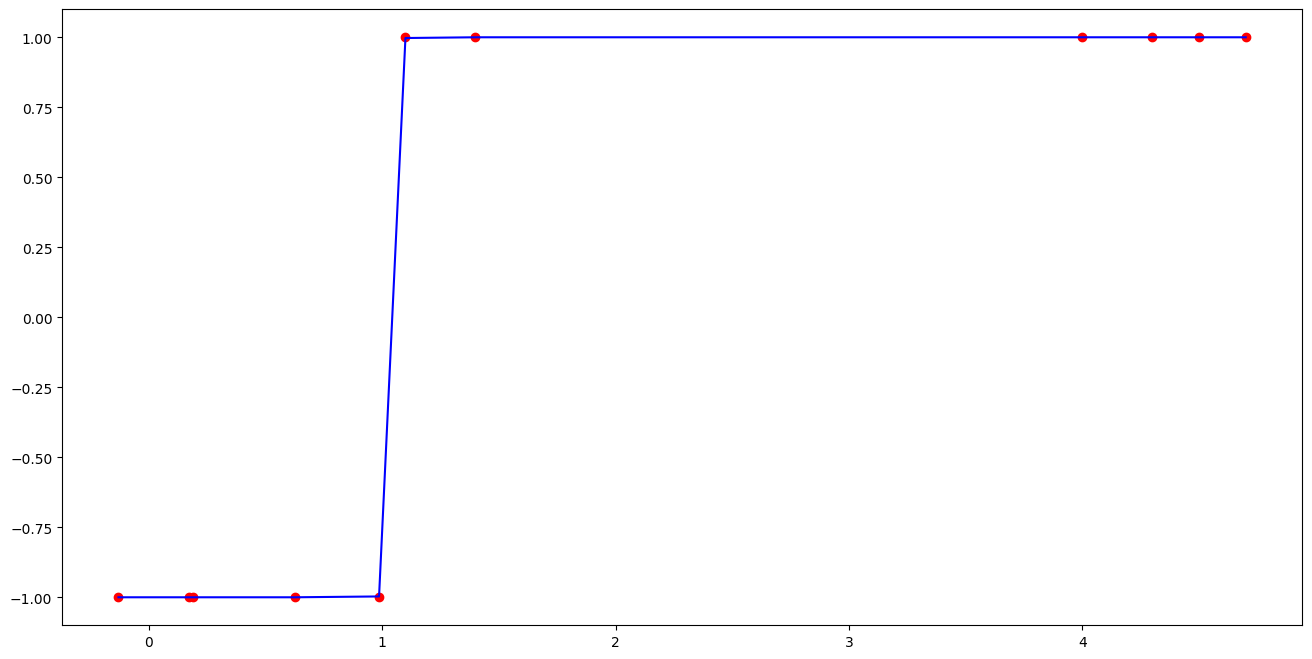

In [21]:
plt.figure(figsize = (16,8))
plt.scatter(X,Y,c='red')
plt.plot(X.reshape(-1,1),tanh(np.dot(X_train,weight_history[-1])),c='blue')
plt.show()
exit()

# Exercise 6.13. Compare the efficacy of two-class cost functions I

In [22]:
# data input
csvname = datapath + '/breast_cancer_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))

(8, 699)
(1, 699)


In [23]:
X_train = np.vstack( (x, np.ones((1,np.shape(x)[1]))) ).transpose()
Y_train = y[0]
print(np.shape(X_train))
print(np.shape(Y_train))

(699, 9)
(699,)


In [24]:
def relu(t):
    return np.maximum(0,t)

In [25]:
def relu_gradient(X,Y,w):
    gradient = np.zeros(len(w))
    for i in range(X.shape[0]):
        if Y[i]*np.dot(X[i,:],w) < 0:
            gradient += -Y[i]*X[i,:]
    return gradient/X.shape[0]

In [26]:
def relu_cost(X,Y,w):
    cost = 0
    for i in range(X.shape[0]):
        cost += relu( -Y[i] * np.dot(X[i,:],w) )
    return cost/X.shape[0]

In [27]:
def relu_gradient_decent(X,Y,w_start,step_size,max_its):
    w = w_start
    for _ in range(max_its):
        grad = relu_gradient(X,Y,w)
        w = w - step_size*grad
    return w

In [28]:
w_start = np.ones(9)
step_size = 0.1
max_its = 100
w = relu_gradient_decent(X_train,Y_train,w_start,step_size,max_its)
weight_history_soft_max,cost_history_soft_max = soft_max_gradient_decent(X_train,Y_train,w_start,step_size,max_its)


In [ ]:
def count_miss_classification(X,Y,w):
    count = 0
    for i in range(X.shape[0]):
        if np.sign(np.dot(X[i,:],w)) != Y[i]:
            count += 1
    return count

: 